In [2]:
import rebound
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sim = rebound.Simulation()

sim.add( m=1. )                
sim.add( m=0, x=1., vy=1.)

sim.status()

---------------------------------
REBOUND version:     	2.14.7
REBOUND built on:    	May  3 2016 22:51:58
Number of particles: 	2
Selected integrator: 	ias15
Simulation time:     	0.000000
Current timestep:    	0.001000
---------------------------------
<rebound.Particle object, id=0 m=1.0 x=0.0 y=0.0 z=0.0 vx=0.0 vy=0.0 vz=0.0>
<rebound.Particle object, id=0 m=0.0 x=1.0 y=0.0 z=0.0 vx=0.0 vy=1.0 vz=0.0>
---------------------------------


In [3]:
#sim.getWidget()
#This dosen't work since rebound is outdated...

In [4]:
times = np.linspace(0,100,1000)
data = np.zeros((1000,3))
for i,t in enumerate(times):
    sim.integrate(t)
    data[i] = sim.particles[1].xyz

In [5]:
print data

[[ 1.          0.          0.        ]
 [ 0.99499417  0.09993302  0.        ]
 [ 0.98002678  0.19886554  0.        ]
 ..., 
 [ 0.74439692 -0.6677374   0.        ]
 [ 0.8073996  -0.59000499  0.        ]
 [ 0.86231887 -0.50636564  0.        ]]


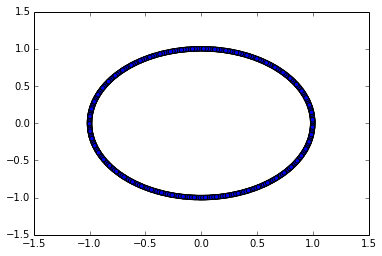

In [6]:
fig = plt.figure()
ax= plt.subplot(111)
ax.scatter(data[:,0], data[:,1])

In [7]:
#adding some non-newtonian potential
sim = rebound.Simulation()
sim.add(m=0, x=1, vy=1.)

def af(simp):
    r = np.sqrt(simp.contents.particles[0].x**2 + simp.contents.particles[0].y**2+ simp.contents.particles[0].z**2)
    simp.contents.particles[0].ax = -simp.contents.particles[0].x/(r*r*r) 
    simp.contents.particles[0].ay = -simp.contents.particles[0].y/(r*r*r)
    simp.contents.particles[0].az = -simp.contents.particles[0].z/(r*r*r)
    
sim.additional_forces = af

In [8]:
times = np.linspace(0,100,1000)
data = np.zeros((1000,3))
for i,t in enumerate(times):
    sim.integrate(t)
    data[i] = sim.particles[0].xyz

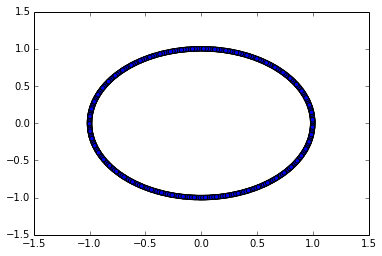

In [9]:
fig = plt.figure()
ax= plt.subplot(111)
ax.scatter(data[:,0], data[:,1])

In [44]:
import rebound
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#adding some non-newtonian potential
sim = rebound.Simulation()
E = -0.337
X = 0.3
v = 1.
R_c = 0.14
q = 0.9

def calcVy(x, E, R_c):
    return np.sqrt(2*E - np.log(x*x + R_c*R_c ))

sim.add(m=0, x=X, y=0, vx=0, vy=calcVy(X, E, R_c))

def af(simp):
    r = np.sqrt(simp.contents.particles[0].x**2 + simp.contents.particles[0].y**2+ simp.contents.particles[0].z**2)
    simp.contents.particles[0].ax = -(v**2 * simp.contents.particles[0].x)/((simp.contents.particles[0].y**2/(q**2)) + R_c**2 + simp.contents.particles[0].x**2)
    simp.contents.particles[0].ay = -(v**2 * simp.contents.particles[0].y)/((q**2)*(R_c**2 + simp.contents.particles[0].x**2.)+ simp.contents.particles[0].y**2)        
    simp.contents.particles[0].az = 0
    
sim.additional_forces = af


In [45]:
def bisect(sim,t1,t2):
    tm = (t1+t2)/2.
    if t2-t1<1e-8:
        return tm
    sim.integrate(tm)
    if sim.particles[0].y>0.:
        t2 = tm
        return bisect(sim,t1,t2)
    else:
        t1 = tm
        return bisect(sim,t1,t2)

In [50]:
Ncross = 2000
y_p = -1.
t_p = -1.
data = np.zeros((Ncross,2,3))
crossings = 0
while (crossings < Ncross):
    sim.step()
    if (sim.particles[0].y > 0 and y_p < 0):
        bisect(sim, sim.t, t_p )
        data[crossings,0] = sim.particles[0].xyz
        data[crossings,1] = sim.particles[0].vxyz
        sim.integrate(sim.t+0.1)
        crossings += 1
    y_p = sim.particles[0].y
    t_p = sim.t

In [51]:
#print data

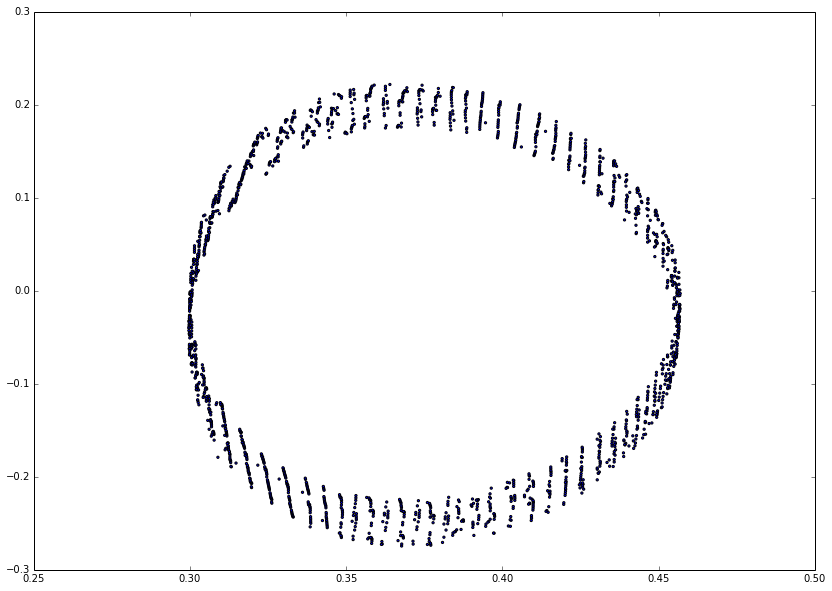

In [52]:
fig = plt.figure(figsize=(14, 10))
ax= plt.subplot(111)
ax.scatter(data[:,0,0], data[:,1,0], marker=".")

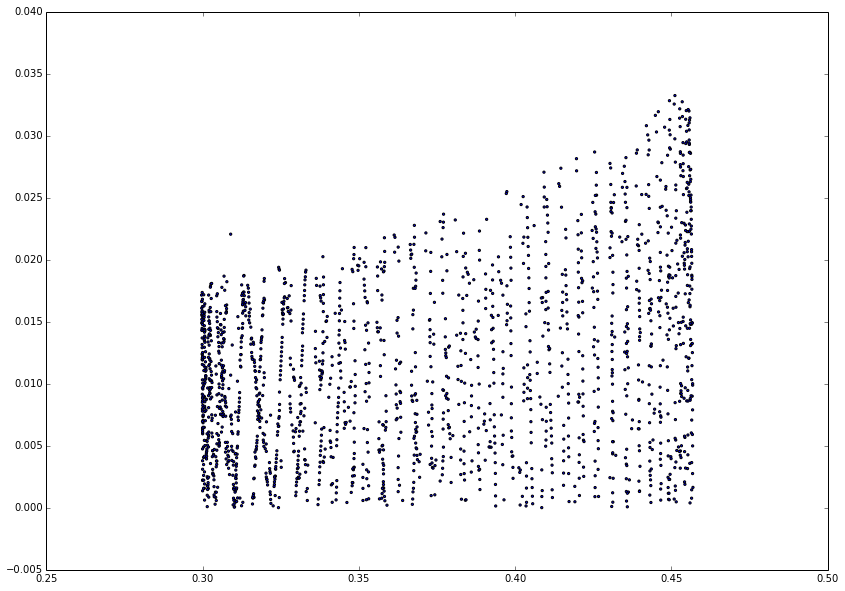

In [53]:
fig = plt.figure(figsize=(14, 10))
ax= plt.subplot(111)
ax.scatter(data[:,0,0], data[:,0,1], marker=".")